In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
movies = pd.read_csv("C:\\Users\\aasma\\Downloads\\archive\\movie.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [17]:
rating = pd.read_csv("C:\\Users\\aasma\\Downloads\\archive\\rating.csv")
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [35]:
merged_data = pd.merge(movies, rating, on='movieId', how='inner')
merged_data

,movieId,title,genres,release_year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...,...
19999853,131254,Kein Bund für's Leben (2007),Comedy,2007.0,79570,4.0,2015-03-30 19:32:59
19999854,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002.0,79570,4.0,2015-03-30 19:48:08
19999855,131258,The Pirates (2014),Adventure,2014.0,28906,2.5,2015-03-30 19:56:32
19999856,131260,Rentun Ruusu (2001),(no genres listed),2001.0,65409,3.0,2015-03-30 19:57:46


# EDA

In [25]:
movies.isnull().sum()

movieId          0
title            0
genres           0
release_year    22
dtype: int64

In [27]:
movies.columns

Index(['movieId', 'title', 'genres', 'release_year'], dtype='object')

In [24]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [28]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [31]:
# Split genres into individual genres and geerating a dataframe
genres_df = movies['genres'].str.split('|', expand=True)
genres_stacked = genres_df.stack()
genre_counts = genres_stacked.value_counts()
genre_counts

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
dtype: int64

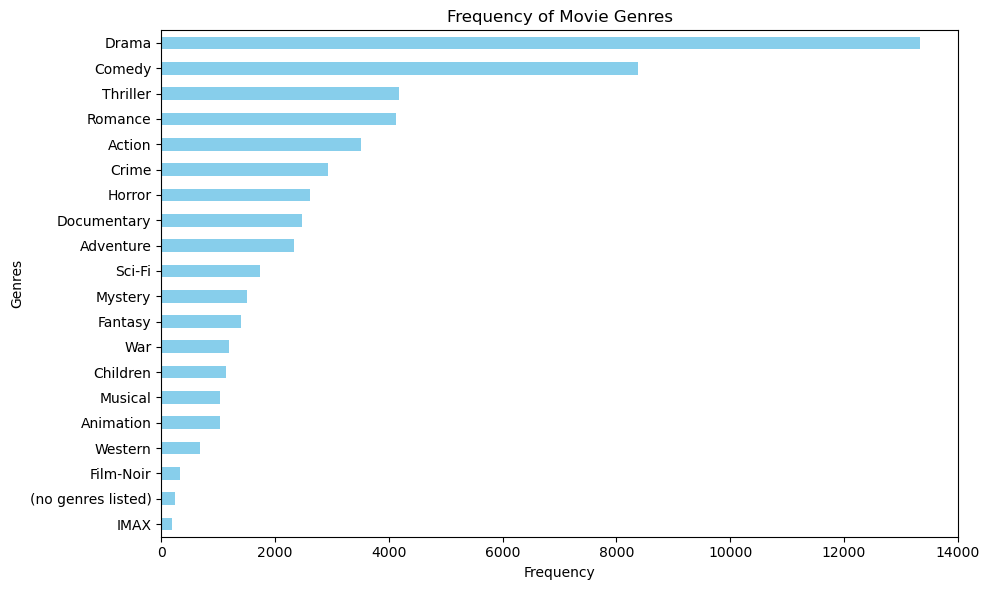

In [44]:
# Plot to show distribution of genres
plt.figure(figsize=(10, 6))
genre_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

Insights:
- The most common genre is: Drama

In [38]:
# Counts number of reviews for each rating
rating_counts = merged_data['rating'].value_counts()
print("Number of ratings for a respective rating:\n", rating_counts)

Number of reviews wih respect to rating:
 4.0    5561834
3.0    4291157
5.0    2898551
3.5    2200116
4.5    1534751
2.0    1430983
2.5     883383
1.0     680725
1.5     279246
0.5     239112
Name: rating, dtype: int64


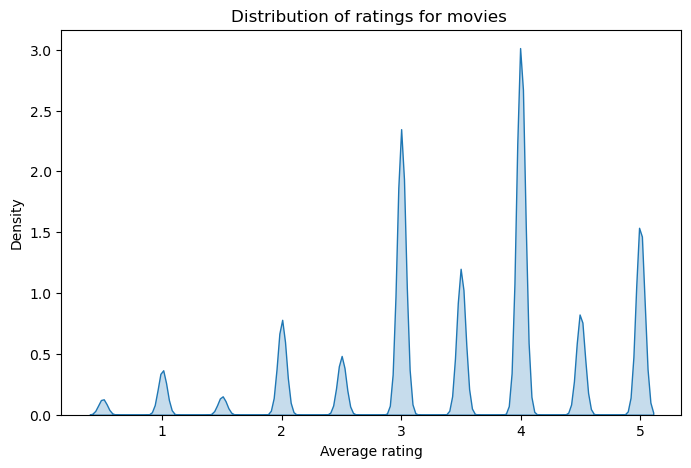

In [42]:
# Density plot for to have smoothed representation of the distribution because it is a continuous variable
plt.figure(figsize=(8, 5))
sns.kdeplot(merged_data['rating'], fill=True, palette='magma')
plt.title('Distribution of ratings for movies ')
plt.xlabel('Average rating')
plt.ylabel('Density')
plt.show()

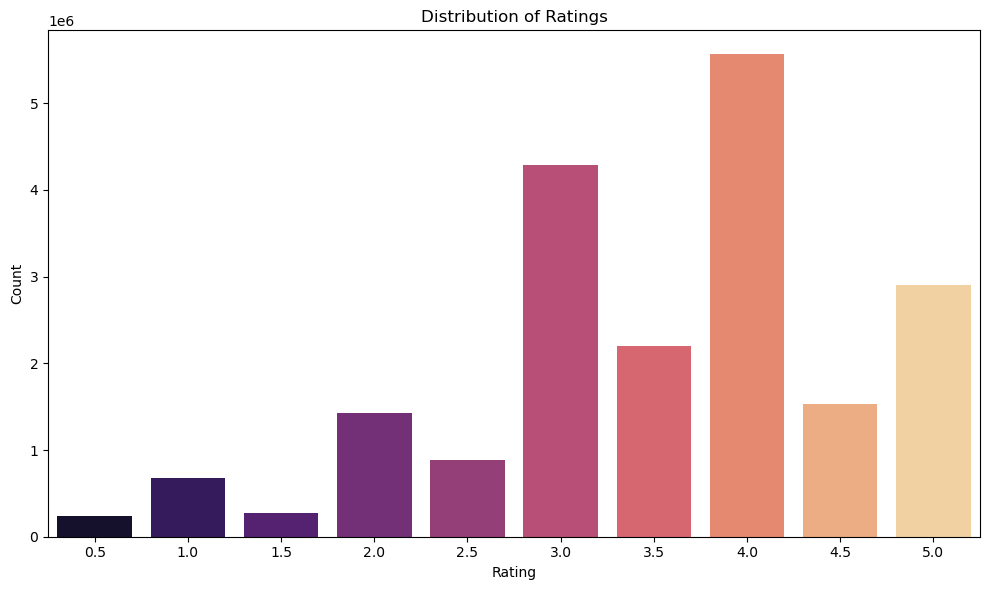

In [41]:
# Bar plot showing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Insights:
- Most of the movies are given a rating of 4

The earliest released movie is: 1891.0
The earliest released movie is: 2015.0
Year with the highest number of movies released: 1995.0


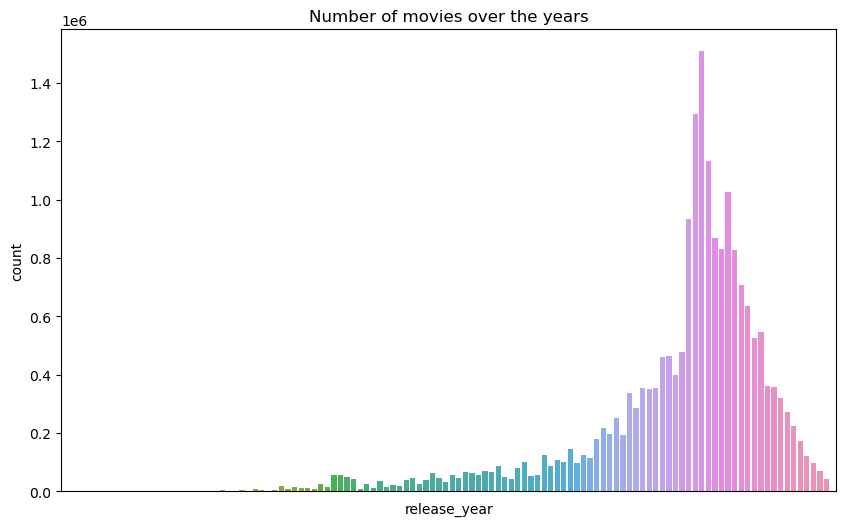

In [60]:
# Plot to show number of reviews over the years

earliest_year = merged_data['release_year'].min()
print("The earliest released movie is:", earliest_year)

latest_year = merged_data['release_year'].max()
print("The earliest released movie is:", latest_year)

movies_per_year = merged_data['release_year'].value_counts()

year_with_most_movies = movies_per_year.idxmax()
print("Year with the highest number of movies released:", year_with_most_movies)

#plot
plt.figure(figsize=(10, 6)) 
sns.countplot(x='release_year', data=merged_data)
plt.title('Number of movies over the years')
plt.xticks([])
plt.show()

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data/archive/rating.csv')
df_movies = pd.read_csv('./data/archive/movie.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
df.shape

(20000263, 4)

In [6]:
len(df['userId'].value_counts())

138493

In [7]:
len(df['movieId'].value_counts())

26744

In [8]:
df = df.drop(['timestamp'], axis=1)

In [12]:
df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [208]:
df_movies = df_movies.drop(['genres'], axis=1)

In [209]:
df_movies.set_index('movieId', inplace=True)

In [187]:
df_movies.head()

,title
movieId,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)


In [17]:
user_cnt = pd.DataFrame(df.groupby('userId').size(), columns=['cnt'])

In [18]:
user_cnt.head()

,cnt
userId,
1,175
2,61
3,187
4,28
5,66


In [42]:
movie_cnt = pd.DataFrame(df.groupby('movieId').size(), columns=['cnt'])

In [72]:
movie_threshold = 300
user_threshold = 200

- We have removed the users with rating less than 200 and movies with less than 300 ratings.
- It is done due to lack of computational resources.

In [73]:
popular_movies = list(set(movie_cnt.query('cnt >= @movie_threshold').index))

In [74]:
active_users = list(set(user_cnt.query('cnt >= @user_threshold').index))

In [78]:
df_drop_movies = df[df.movieId.isin(popular_movies)]

In [79]:
df_clean = df_drop_movies[df_drop_movies['userId'].isin(active_users)]

In [80]:
df_clean.shape

(11788644, 3)

In [81]:
df_clean.head()

,userId,movieId,rating
541,7,3,3.0
542,7,7,3.0
543,7,11,4.0
544,7,15,2.0
545,7,16,3.0


In [162]:
movie_user_mat = df_clean.pivot(index='movieId', columns='userId', values='rating').fillna(0)

- The user item matrix is created using pivot function of pandas

In [163]:
movie_user_mat.shape

(5726, 26826)

In [228]:
movie_user_mat.head()

userId,7,11,14,24,31,53,54,58,69,82,...,138456,138457,138459,138464,138467,138472,138474,138477,138483,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.5,4.5,4.0,3.0,4.0,4.0,5.0,4.0,5.0,...,1.0,0.0,2.0,4.0,4.0,3.0,5.0,3.0,4.0,3.5
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,3.0,4.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [164]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [165]:
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

- As we can see above, the user-movie matrix is sparse. So, we have stored it using csr_matrix of scipy.

In [166]:
model_knn = NearestNeighbors(metric='cosine', n_neighbors=25, n_jobs=-1)

- We have applied K-Nearest Neighbor method to find out the similar items and recommend them to the user.

In [167]:
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=25)

In [194]:
movie_to_idx = {}
idx_to_movie = {}

In [195]:
for i in df_movies.index:
    idx_to_movie[i] = df_movies.loc[i, 'title'][:-7]

In [197]:
for i in movie_to_idx:
    if i == 'Shawshank Redemption':
        print(i, movie_to_idx[i])

In [196]:
movie_to_idx = {v: k for  k, v in idx_to_movie.items()}

In [216]:
from thefuzz import fuzz

In [217]:
def matching_the_movie(movie):
    match = []
    for title, idx in movie_to_idx.items():
        ratio = fuzz.ratio(title.lower(), movie.lower())
        if ratio >= 60:
            match.append((title, idx, ratio))

    match = sorted(match, key=lambda x: x[2])[::-1]

    if not match:
        return -1
    return match[0][1]


- In the movie dataset, we may not find the perfect match for the movie. So, we have found the similarity between two movie titles and have used the most similar one.

In [225]:
def make_recommentations(data, movie):
    model_knn.fit(data)
    idx = matching_the_movie(movie)

    dist, ind = model_knn.kneighbors(data[idx], n_neighbors=15)

    recommends = sorted(list(zip(ind.squeeze().tolist(), dist.squeeze().tolist())), key = lambda x: x[1])[:0:-1]

    for i, (index, dist) in enumerate(recommends):
        print(f'{i+1}: {idx_to_movie[index]}, distance = {dist}')


- In the above function, we are finding the nearest neighbors and giving results based on that.

In [227]:
make_recommentations(movie_user_mat_sparse, 'Jurassic Park')

1: Kiss of Death, distance = 0.8458416829447526
2: Davy Crockett, King of the Wild Frontier, distance = 0.8454003857935992
3: E.T. the Extra-Terrestrial, distance = 0.8432470558048535
4: Just Cause, distance = 0.8396756800230524
5: Kiss of the Dragon, distance = 0.8373982176486725
6: Kid in King Arthur's Court, A, distance = 0.8352106900814616
7: King Creole, distance = 0.8302100797016261
8: Dingo, distance = 0.827171478166308
9: Perez Family, The, distance = 0.8190524687396645
10: Dirty Work, distance = 0.8109718296226611
11: Lady Vanishes, The, distance = 0.7963506231852329
12: Ref, The, distance = 0.7529243792999439
13: Small Faces, distance = 0.7429853226797964
14: Pink Floyd: The Wall, distance = 0.7298398678710138


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import keras
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam
import pickle

In [2]:
 # Loading data
rating = pd.read_csv("rating.csv")
movie = pd.read_csv("movie.csv")

In [3]:
rating.head() 

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [7]:
# feature extraction 
rat_pre = rating[['userId', 'movieId', 'rating']]
mo_pre = movie[['movieId','title']]

In [8]:
rat_pre.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [9]:
mo_pre.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
# merged data
df = mo_pre.merge(rat_pre, how="left", on="movieId")

In [11]:
data = df[['userId','movieId','rating']]

In [12]:
data.head()

,userId,movieId,rating
0,3.0,1,4.0
1,6.0,1,5.0
2,8.0,1,4.0
3,10.0,1,4.0
4,11.0,1,4.5


In [13]:
# splitting the data into 80 for train
data = shuffle(data)
cutoff = int(0.8*len(data))

In [14]:
data_train = data.iloc[:cutoff]
data_test = data.iloc[cutoff:]

In [15]:
#defining embeddings, epochs, latent dimensions, no. of users, no. of movies
K = 10
mean = data_train.rating.mean()
epochs = 2
reg = 0.
n_u = len(data['userId'].value_counts())
n_m = len(data['movieId'].value_counts())

In [16]:
n_u

138493

In [17]:
n_m

27278

In [18]:
u = Input(shape=(1,))
m = Input(shape=(1,))

In [19]:
u_embedding = Embedding(n_u, K, embeddings_regularizer = l2(reg))(u)
m_embedding = Embedding(n_m, K, embeddings_regularizer = l2(reg))(m)

2024-02-29 16:42:23.509743: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-29 16:42:23.509838: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-29 16:42:23.509871: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-29 16:42:23.510229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-29 16:42:23.510511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
u_bias = Embedding(n_u, 1, embeddings_regularizer = l2(reg))(u)
m_bias = Embedding(n_m, 1, embeddings_regularizer = l2(reg))(m)

In [24]:
# dot product of user embeddings with movie embeddings
x = Dot(axes =2)([u_embedding, m_embedding])

In [25]:
x = Add()([x, u_bias, m_bias])

x = Flatten()(x)

model = Model(inputs=[u, m], outputs=x)
model.compile(
loss ='mse',
optimizer = SGD(lr=0.01, momentum = 0.9),
metrics = ['mse'],)

print(f'model: {model}')

model: <keras.src.engine.functional.Functional object at 0x29a7d3290>


In [28]:
#training the model
r = model.fit(
x=[data_train.userId.values, data_train.movieId.values],
y=data_train.rating.values - mean, epochs=2, batch_size=128,
validation_data = ([data_test.userId.values, data_test.movieId.values],
                  data_test.rating.values - mean))

Epoch 1/2


2024-02-29 16:46:25.383630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-29 16:46:25.405643: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


125005/125005 [==============================] - 974s 8ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/2
125005/125005 [==============================] - 966s 8ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan


In [55]:
# recommendation function
def recom(id):
    user_id = 15
    all_movie_ids = np.unique(data['movieId'])
    movies_rated_by_user = data[data['userId'] == user_id]['movieId'].values

    movies_to_recommend = [movie_id for movie_id in all_movie_ids if movie_id not in movies_rated_by_user]

    predicted_ratings = model.predict([np.array([user_id]*len(movies_to_recommend)), np.array(movies_to_recommend)])

    recommendations = list(zip(movies_to_recommend, predicted_ratings))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    recommendations_list = []
    top_n = 10
    print("Top {} Recommendations for User {}".format(top_n, user_id))
    for i in range(top_n):
        movie_id, predicted_rating = recommendations[i]
        movie_title = movie[movie['movieId'] == movie_id]['title'].values[0]
        recommendations_list.append({'Movie ID': movie_id, 'Title': movie_title})
    recommendations_df = pd.DataFrame(recommendations_list)
    print(recommendations_df)
    return recommendations_df


In [56]:
recom(12)

851/851 [==============================] - 2s 2ms/step
Top 10 Recommendations for User 15
   Movie ID                                          Title
0       858                          Godfather, The (1972)
1       904                             Rear Window (1954)
2      2019    Seven Samurai (Shichinin no samurai) (1954)
3      1221                 Godfather: Part II, The (1974)
4      1212                          Third Man, The (1949)
5      3030                                 Yojimbo (1961)
6       922  Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
7      7502                        Band of Brothers (2001)
8      1178                          Paths of Glory (1957)
9       912                              Casablanca (1942)


,Movie ID,Title
0,858,"Godfather, The (1972)"
1,904,Rear Window (1954)
2,2019,Seven Samurai (Shichinin no samurai) (1954)
3,1221,"Godfather: Part II, The (1974)"
4,1212,"Third Man, The (1949)"
5,3030,Yojimbo (1961)
6,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
7,7502,Band of Brothers (2001)
8,1178,Paths of Glory (1957)
9,912,Casablanca (1942)
